In [1]:
# Import dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import gmplot
import scipy.stats as stats
#from config import api_key

In [2]:
# Read/store data
ca_1990 = pd.read_csv('Data/housing.csv')
ca_current = pd.read_csv('Data/Total.csv')

In [3]:
ca_1990.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [4]:
ca_1990.dropna().count()

longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           20433
total_bedrooms        20433
population            20433
households            20433
median_income         20433
median_house_value    20433
ocean_proximity       20433
dtype: int64

#### Reason for dropping values
There is an approximate 1% difference when rows with any empty values are dropped and the data is derived as the median of each of its categories per the district; therefore, the values are negligible.

In [5]:
ca_1990 = ca_1990.dropna()

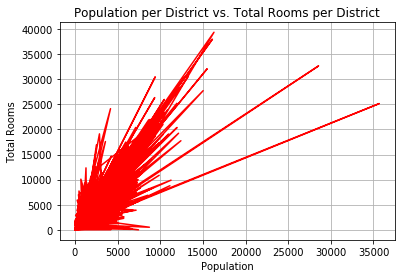

In [18]:
plt.plot(ca_1990['population'], ca_1990['total_rooms'], c='r')
plt.title('Population per District vs. Total Rooms per District')
plt.xlabel('Population')
pop_vs_rooms = plt.ylabel('Total Rooms')
plt.grid()
plt.savefig('pop_vs_rooms.png', dpi=300)

### California Housing (1990) Analysis

Sort and slice data to get top and bottom 5%

In [19]:
# Sort data by house value
ca_1990 = ca_1990.sort_values('median_house_value', ascending=False).reset_index(drop=True)
ca_1990.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.42,34.08,48,2413,261.0,770,248,15.0001,500001,<1H OCEAN
1,-118.56,34.25,31,1962,243.0,697,242,8.5650,500001,<1H OCEAN
2,-118.56,34.24,23,2980,362.0,1208,378,8.1714,500001,<1H OCEAN
3,-118.41,34.07,52,3562,394.0,1163,361,15.0001,500001,<1H OCEAN
4,-118.41,34.07,52,1202,142.0,408,138,15.0001,500001,<1H OCEAN


In [20]:
# Slice the top 5%
top5 = ca_1990.iloc[:round(len(ca_1990['median_house_value'])*0.05), :].sort_values('median_house_value', ascending=False)
top5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.42,34.08,48,2413,261.0,770,248,15.0001,500001,<1H OCEAN
644,-117.67,33.47,22,2728,616.0,1081,566,1.6393,500001,<1H OCEAN
632,-118.50,33.97,29,2737,808.0,1157,696,5.1280,500001,<1H OCEAN
633,-122.47,37.73,50,1653,252.0,641,224,10.6605,500001,NEAR OCEAN
634,-122.47,37.73,52,2151,280.0,762,274,10.7309,500001,NEAR OCEAN


In [21]:
# Slice the bottom 5%
bottom5 = ca_1990.iloc[round(len(ca_1990['median_house_value'])*0.95): len(ca_1990['median_house_value']),:].sort_values('median_house_value', ascending=False)
bottom5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19411,-119.83,36.78,35,1789,357.0,933,357,2.5223,66200,INLAND
19412,-119.12,36.29,29,1638,323.0,942,322,2.1731,66200,INLAND
19413,-120.60,37.35,34,1722,316.0,904,315,2.4653,66100,INLAND
19415,-122.33,40.47,30,2502,523.0,1296,481,2.1250,66100,INLAND
19416,-120.07,36.96,42,963,216.0,471,211,2.2898,66100,INLAND


Plotting Top 5% and Bottom 5% on gmap (Use gmplot package)

In [22]:
# Set the center of the map
gmap = gmplot.GoogleMapPlotter(top5['latitude'].median(),
                                   top5['longitude'].median(), 100000)
# Plot scatter points based on LatLng
gmap.scatter(top5['latitude'], top5['longitude'], '#FF0000', 
                              size = 2000, marker = False ) 
gmap.scatter(bottom5['latitude'], bottom5['longitude'], '#110870', 
                              size = 2000, marker = False ) 
# Draw out to 'Plot' folder in html format
# gmap.draw("gmap.html")

Based on the plot, we can assume that the median house value is heavily influenced by their location.

Now we clean our data and create a new dataframe with informations we need

First, we look at the relationship between income and house value

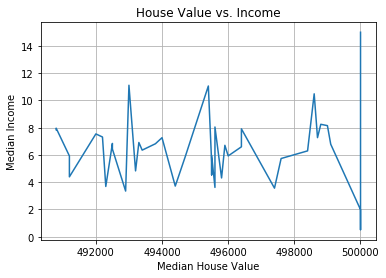

In [68]:
plt.plot(top5['median_house_value'], top5['median_income'])
plt.xlabel('Median House Value')
plt.ylabel('Median Income')
house_vs_income = plt.title('House Value vs. Income')
plt.grid()
plt.savefig('house_val_vs_inc.png', dpi=300)

Above plot shows that there's no visible correlation between income and house value, since there's no specifice trending (increase nor decrease) in house value as income increase. Rather, we can see that people with lower income(for example, for income=2) live in more expensive houses. 

It is also possible that number of rooms/bedrooms are related to house value

## Ocean Proximity vs Count of Houses

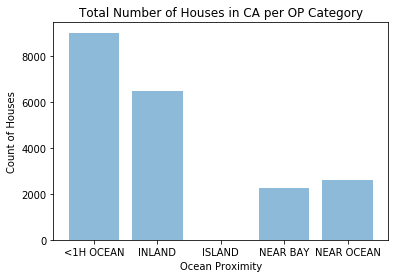

In [77]:
x_axis_op = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = ca_1990.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Total Number of Houses in CA per OP Category")
plt.savefig('op_vs_count_of_houses.png', dpi=300)
plt.show()

The process shows that people totally in 1990 preferred to live near the ocean.

## Top 5 Percent Ocean Proximity vs Count of Houses

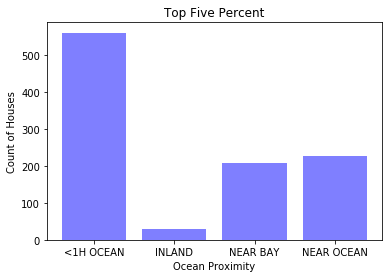

In [27]:
x_axis_op = ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = top5.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, color='b', alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Top Five Percent")
plt.savefig("top_five_op_vs_COH.png", dpi=300)
plt.show()

## Bottom 5 Percent Ocean Proximity vs Count of Houses

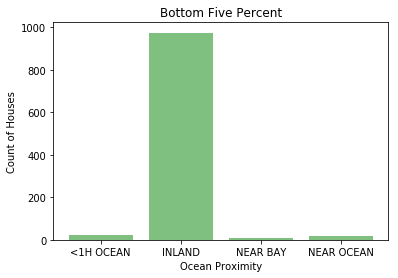

In [28]:
x_axis_op = ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = bottom5.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, color='g', alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Bottom Five Percent")
plt.savefig("bottom_five_op_vs_COH.png", dpi=300)
plt.show()

Comparison between two bar charts show that there is a tendancy of living near ocean/bay rather than inland.

## Top Five Ocean Proximity Average Median Price

In [60]:
op_mean_house_value_top = top5.groupby("ocean_proximity")["median_house_value"].mean().round(2)
op_mean_df_top = pd.DataFrame(op_mean_house_value_top)
op_mean_df_top = op_mean_df_top.rename(columns={"median_house_value":"Average Median Price"})
op_mean_df_top['Average Median Price'] = op_mean_df_top['Average Median Price'].map('${:,.2f}'.format)
op_mean_df_top

,Average Median Price
ocean_proximity,
<1H OCEAN,"$499,800.76"
INLAND,"$500,000.96"
NEAR BAY,"$499,829.92"
NEAR OCEAN,"$499,811.10"


## Bottom Five Ocean Proximity Average Median Price

In [65]:
op_mean_house_value_bottom = bottom5.groupby("ocean_proximity")["median_house_value"].mean().round(2)
op_mean_df_bottom = pd.DataFrame(op_mean_house_value_bottom)
op_mean_df_bottom = op_mean_df_bottom.rename(columns={"median_house_value":"Average Median Price"})
op_mean_df_bottom['Average Median Price'] = op_mean_df_bottom['Average Median Price'].map('${:,.2f}'.format)
op_mean_df_bottom


,Average Median Price
ocean_proximity,
<1H OCEAN,"$51,416.67"
INLAND,"$55,907.90"
NEAR BAY,"$43,271.43"
NEAR OCEAN,"$52,076.47"


### df2(2018) Analysis 

In [74]:
ca_current.head()

,Unnamed: 0,Listing ID,S,Sub Type,St#,St Name,City,MLS Area,SLC,L/C Price,...,Br/Ba,Sqft,YrBuilt,Ac/LSqft,DOM/CDOM,View YN,Pool Private YN,BAC,Contract Status Change Date,MLS
0,1,180048066,S,MANL/D,12,Via Veneto #12,CHU,NaN,NaN,"$89,000",...,"2/2,0,0,0",1000/P,2006,NaN,8-Aug,NaN,N,2500,9/14/2018,SAND
1,1,180047253,S,CONDO/A,1653,Pentecost Way #1,SD,NaN,NaN,"$158,000",...,"1/1,0,0,0",668/A,1980,NaN,1-Jan,NaN,N,2.5,9/7/2018,SAND
2,1,180046958,S,CONDO/A,6101,Adelaide Ave #107,SD,NaN,NaN,"$168,250",...,"0/1,0,0,0",299/A,1984/ASR,NaN,5-May,NaN,N,2.5,9/14/2018,SAND
3,1,180047651,S,CONDO/A,589 N,Johnson #137,ELC,NaN,NaN,"$175,000",...,"2/1,0,0,0",883/,1980,NaN,4-Apr,NaN,N,500,8/28/2018,SAND
4,1,180051931,S,SFR,3138,Roadrunner,BSPG,NaN,NaN,"$190,000",...,"2/2,0,0,0",1356/A,1986,NaN,0/135,NaN,N,3,9/14/2018,SAND


In [38]:
# Keep only the columns that are useful 
df2 = df2[['Sub Type', 'St#', 'St Name', 'City', 'L/C Price', 'Br/Ba', 'YrBuilt']]
df2.head()
#df2 = df2.drop(on=0)

NameError: name 'df2' is not defined

In [39]:
yr_blt = df2.loc[:, 'YrBuilt'].str.split('/', expand=True)[0]
yr_blt = pd.DataFrame(yr_blt)
yr_blt = yr_blt.fillna(0)

NameError: name 'df2' is not defined

In [40]:
df2['Age'] = ''
count = 0
for i in yr_blt[0]:
        i = 2018 - int(i)
        df2['Age'][count] = i
        count += 1
df2.head()

NameError: name 'df2' is not defined

In [41]:
df2['house_price'] = df2.loc[:, 'L/C Price'].str.split('$', expand=True)[1] 

NameError: name 'df2' is not defined

In [42]:
df2.head()

NameError: name 'df2' is not defined

In [43]:
df2_by_value = df2.set_index("L/C Price")
df2_by_value = df2_by_value.reset_index()
df2_by_value.head()

NameError: name 'df2' is not defined

### Ploting on Gmap

In [ ]:
#for i in df2['St Name']:
#target_url = f"http://maps.googleapis.com/maps/api/geocode/jason?address=Via+Veneto+CHU&key={api_key}"
target_url = 'https://maps.googleapis.com/maps/api/geocode/xml?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&key={api_key}'
geo_data = requests.get(target_url)

In [69]:
print(geo_data)

NameError: name 'geo_data' is not defined

In [80]:
ca_current.groupby("City").count()

,Unnamed: 0,Listing ID,S,Sub Type,St#,St Name,MLS Area,SLC,L/C Price,Price Per Square Foot,Br/Ba,Sqft,YrBuilt,Ac/LSqft,DOM/CDOM,View YN,Pool Private YN,BAC,Contract Status Change Date,MLS
City,,,,,,,,,,,,,,,,,,,,
29P,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,8,8,8
AD,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
AGHI,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,7,7,7
AGNA,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1
AGO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AH,12,12,12,12,12,12,12,12,12,12,12,12,12,11,12,12,12,12,12,12
ALH,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,8,8,10,10,10
ALP,5,5,5,5,5,5,0,0,5,5,5,5,5,0,5,1,5,5,5,5
ALTA,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,7,5,10,10,10
